In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import kstest, cramervonmises, norm

In [24]:
path = 'egsingle_1.txt'

In [29]:
df = pd.read_csv(path, delimiter=' ')

In [30]:
df

,schoolid,childid,year,grade,math,retained,female,black,hispanic,size,lowinc,mobility
1,2020,273026452,0.5,2,1.146,0,Female,0,1,380,40.3,12.5
2,2020,273026452,1.5,3,1.134,0,Female,0,1,380,40.3,12.5
3,2020,273026452,2.5,4,2.300,0,Female,0,1,380,40.3,12.5
4,2020,273030991,-1.5,0,-1.303,0,Female,0,0,380,40.3,12.5
5,2020,273030991,-0.5,1,0.439,0,Female,0,0,380,40.3,12.5
...,...,...,...,...,...,...,...,...,...,...,...,...
7226,4450,310621871,-0.5,1,-1.568,0,Female,1,0,710,66.2,25.4
7227,4450,310621871,0.5,2,-1.555,0,Female,1,0,710,66.2,25.4
7228,4450,314542551,-1.5,0,-1.130,0,Female,1,0,710,66.2,25.4
7229,4450,314542551,-0.5,1,-0.716,0,Female,1,0,710,66.2,25.4


In [63]:
df.dropna()

,schoolid,childid,year,grade,math,retained,female,black,hispanic,size,lowinc,mobility
1,2020,273026452,0.5,2,1.146,0,Female,0,1,380,40.3,12.5
2,2020,273026452,1.5,3,1.134,0,Female,0,1,380,40.3,12.5
3,2020,273026452,2.5,4,2.300,0,Female,0,1,380,40.3,12.5
4,2020,273030991,-1.5,0,-1.303,0,Female,0,0,380,40.3,12.5
5,2020,273030991,-0.5,1,0.439,0,Female,0,0,380,40.3,12.5
...,...,...,...,...,...,...,...,...,...,...,...,...
7226,4450,310621871,-0.5,1,-1.568,0,Female,1,0,710,66.2,25.4
7227,4450,310621871,0.5,2,-1.555,0,Female,1,0,710,66.2,25.4
7228,4450,314542551,-1.5,0,-1.130,0,Female,1,0,710,66.2,25.4
7229,4450,314542551,-0.5,1,-0.716,0,Female,1,0,710,66.2,25.4


В данных нет пропусков

In [31]:
df.dtypes

schoolid      int64
childid       int64
year        float64
grade         int64
math        float64
retained      int64
female       object
black         int64
hispanic      int64
size          int64
lowinc      float64
mobility    float64
dtype: object

Все признаки численные, кроме female

In [32]:
df.describe()

,schoolid,childid,year,grade,math,retained,black,hispanic,size,lowinc,mobility
count,7230.000000,7.230000e+03,7230.000000,7230.000000,7230.000000,7230.000000,7230.000000,7230.000000,7230.000000,7230.000000,7230.000000
mean,3310.076902,2.900984e+08,0.379668,1.812310,-0.536924,0.050899,0.688382,0.141632,753.369018,77.793513,34.169516
std,675.991601,2.954601e+07,1.394678,1.350996,1.534696,0.219807,0.463187,0.348697,312.642943,26.849663,13.900137
min,2020.000000,1.014803e+08,-2.500000,0.000000,-5.219000,0.000000,0.000000,0.000000,113.000000,0.000000,8.800000
25%,2820.000000,2.860084e+08,-0.500000,1.000000,-1.631000,0.000000,0.000000,0.000000,511.000000,59.300000,25.400000
50%,3280.000000,2.971530e+08,0.500000,2.000000,-0.619000,0.000000,1.000000,0.000000,724.000000,92.600000,31.700000
75%,3850.000000,3.037673e+08,1.500000,3.000000,0.551000,0.000000,1.000000,0.000000,944.000000,98.100000,43.700000
max,4450.000000,8.395780e+08,2.500000,5.000000,5.766000,1.000000,1.000000,1.000000,1486.000000,100.000000,67.000000


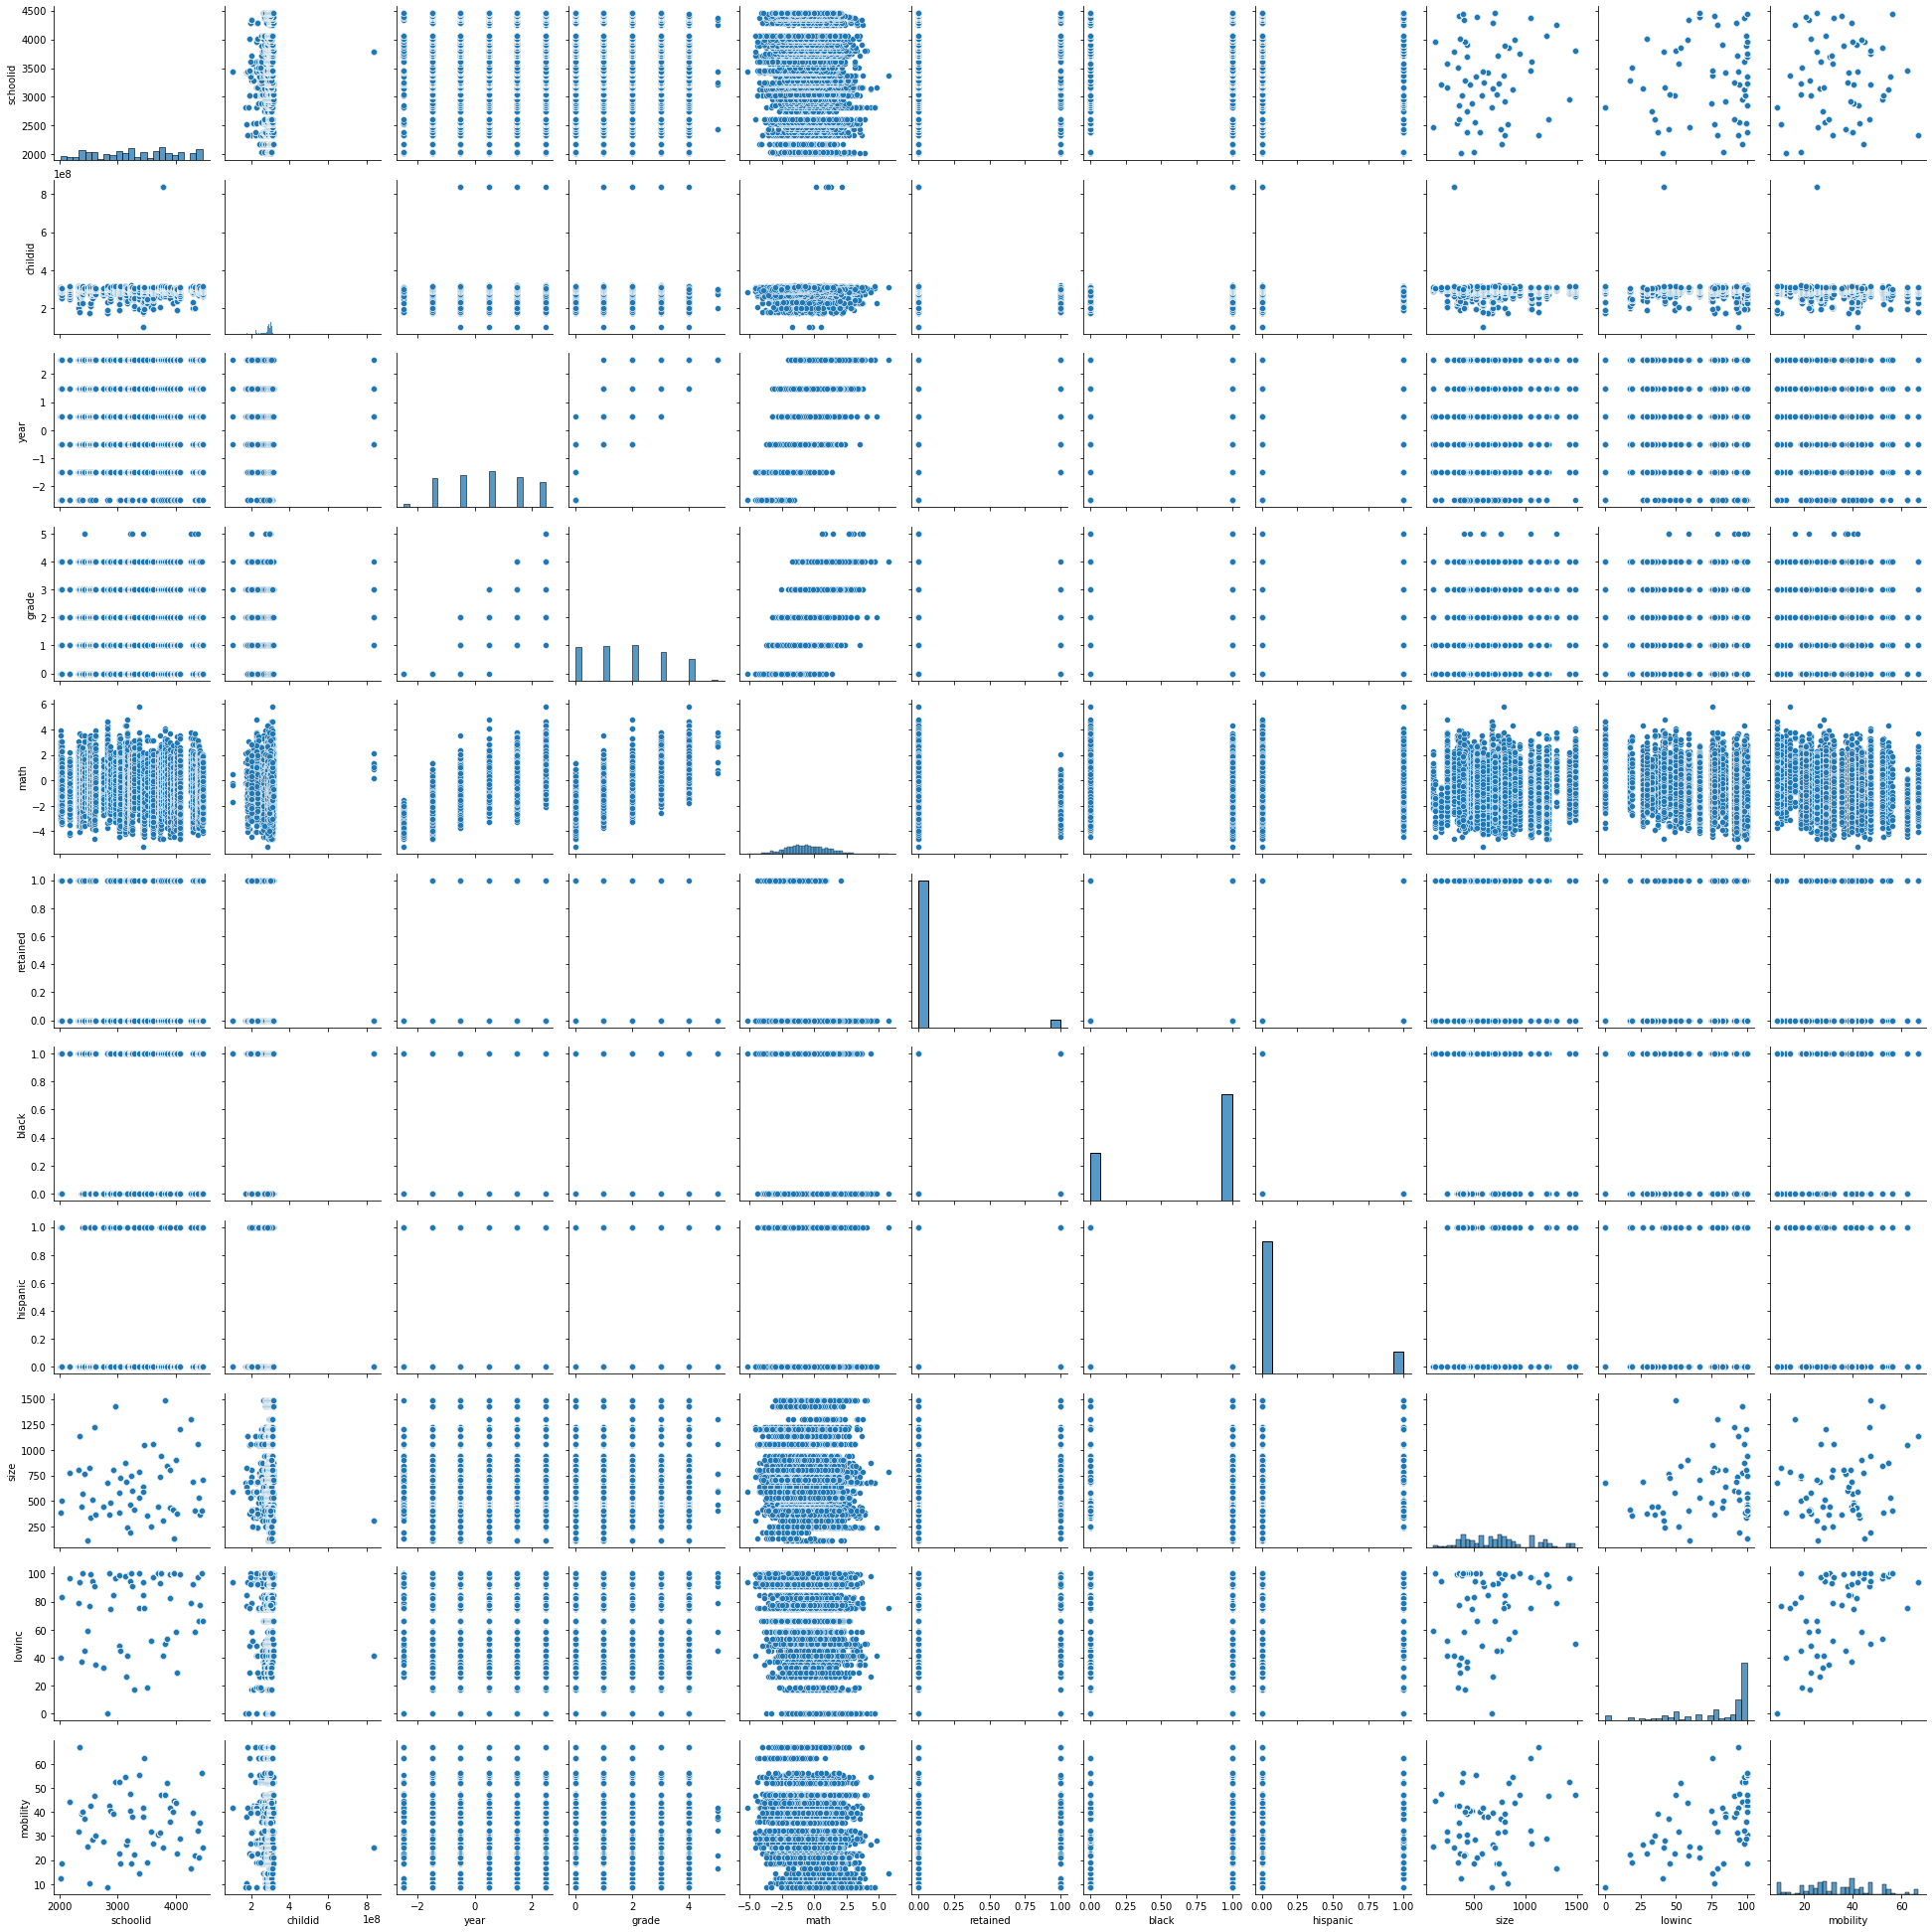

In [33]:
sns.pairplot(data=df)

Исходя из парных графиков, признаки слабо скореллированы

Посмотрим подробнее на распределения

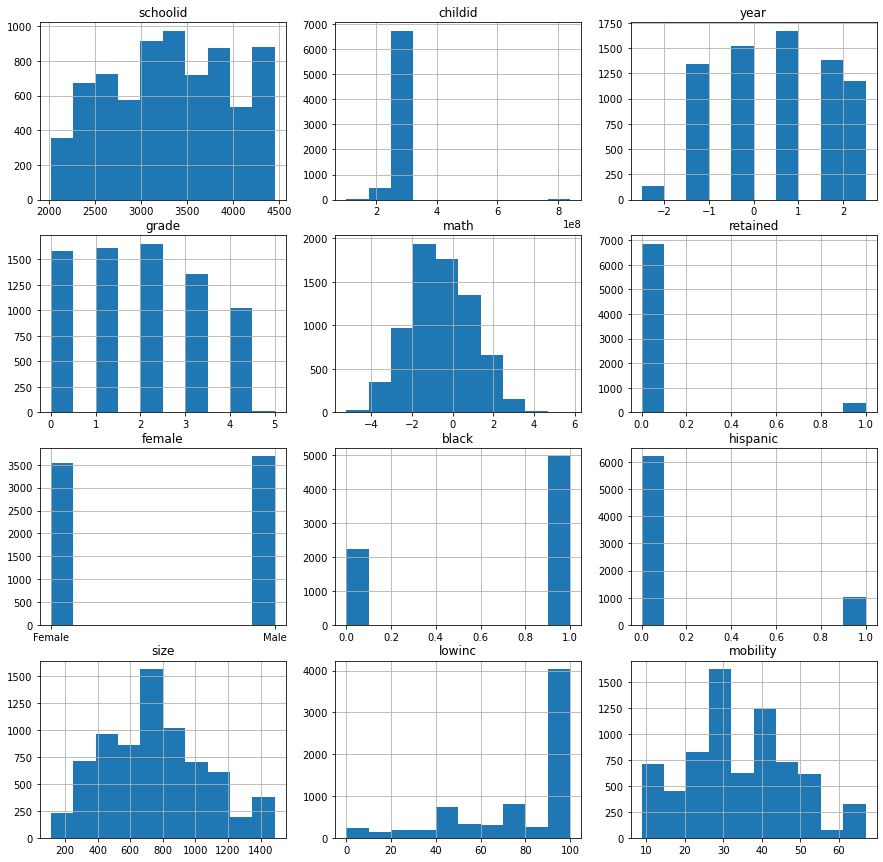

In [50]:
plt.figure(figsize=(15, 15))
i = 1
for c in df.columns:
    plt.subplot(4, 3, i)
    i += 1
    df[c].hist()
    plt.title(str(c))
plt.show()

Попробуем провести несколько тестов на принадлежность признаков `schoolid`, `math`, `size` к нормальному распределению или распределению лапласа с помощью критерия Колмогорова-Смирнова.

### schoolid

In [81]:
pval_n = kstest(np.array(df['schoolid']), 'norm', args=(3310, 676)).pvalue
pval_l = kstest(np.array(df['schoolid']), 'laplace', args=(3310, 676)).pvalue
print('Проверка принадлежности к нормальному\n')
print('p-value = ', pval_n)
print('\n')
print('Проверка принадлежности к лапласу\n')
print('p-value = ', pval_l)

Проверка принадлежности к нормальному

p-value =  1.7476107990326261e-50


Проверка принадлежности к лапласу

p-value =  2.1470809404652046e-54


Значения p-value для каждого из тестов низкие, так как отсутствует какой-то ярко выраженний пик распределения и сложно сделать однозначные выводы.

### math

In [83]:
pval_n = kstest(np.array(df['math']), 'norm', args=(-0.54, 1.53)).pvalue
pval_l = kstest(np.array(df['math']), 'laplace', args=(-0.54, 1.53)).pvalue
print('Проверка принадлежности к нормальному\n')
print('p-value = ', pval_n)
print('\n')
print('Проверка принадлежности к лапласу\n')
print('p-value = ', pval_l)

Проверка принадлежности к нормальному

p-value =  1.7184453716158144e-06


Проверка принадлежности к лапласу

p-value =  4.812956560550476e-19


Данный признак куда больше похож на нормально распределённый, значения p-value сильно выше.

### size

In [84]:
pval_n = kstest(np.array(df['size']), 'norm', args=(753, 312)).pvalue
pval_l = kstest(np.array(df['size']), 'laplace', args=(753, 312)).pvalue
print('Проверка принадлежности к нормальному\n')
print('p-value = ', pval_n)
print('\n')
print('Проверка принадлежности к лапласу\n')
print('p-value = ', pval_l)

Проверка принадлежности к нормальному

p-value =  6.469788697735254e-63


Проверка принадлежности к лапласу

p-value =  3.791849788665395e-51


Оба значения p-value достаточно низкие, однако распределение больше похоже на лапласа из-за тяжелых хвостов и узкого основного пика.